# Portfolio Analysis

Portfolio Analysis is a tool to analyze the performance of a portfolio of stocks. It is a simple tool that allows you to compare the performance of your portfolio with the performance of the S&P 500 index. It also allows you to compare the performance of your portfolio with the performance of other portfolios. It is a simple tool that allows you to compare the performance of your portfolio with the performance of the S&P 500 index. It also allows you to compare the performance of your portfolio with the performance of other portfolios.

#### Importing Libraries

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader.data as web # package used to download financial data
import numpy as np # mathematical functions and linear algebra

import matplotlib.pyplot as plt # plotting library
from matplotlib import dates  # for plotting dates
import seaborn as sns # plotting library
import basic.basic_functions as bf # basic functions

import statsmodels.api as sm   # statistical models (including regression)
import pyfolio as pf # performance and risk analysis of financial portfolios

import warnings
warnings.filterwarnings('ignore')

#### Setting Directories

In [ ]:
base_folder, data, output, archive = bf.set_folders()

Not Running on Colab
Base Folder is C:\Users\abdul\OneDrive\Documents\MSBA
Data Folder is C:\Users\abdul\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\abdul\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\abdul\OneDrive\Documents\MSBA\output
The path to the custom functions is C:/Users/abdul/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\abdul\OneDrive\Documents\MSBA\notebooks\Financial_analysis


#### Importing Data

In [ ]:
sp500 = pd.read_csv(data/'sp500 (2).csv',index_col=0,parse_dates=True)
stock_returns = pd.read_csv(data/'small_portfolio.csv',index_col=0,parse_dates=True)
stock_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2015-01-02 to 2018-03-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GE      813 non-null    float64
 1   JPM     813 non-null    float64
 2   MSFT    813 non-null    float64
 3   PG      813 non-null    float64
dtypes: float64(4)
memory usage: 31.8 KB


### Calculate mean returns

In [ ]:
# Calculate percentage returns
returns = stock_returns.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(weights*meanDailyReturns)

# Print the portfolio return
print(portReturn)

-1.6782226618545438e-05


In [ ]:
weights = pd.DataFrame(weights)
weights.index = returns.columns[:4]
type(weights)

pandas.core.frame.DataFrame

This gives you one performance number for that entire period. But what if you would want to plot the development of the performance over time? For that, you will need the cumulative performance, not the mean performance. Just like with interest in your bank account, the cumulative performance gives you the compounded return at each date in your dataset. It tells you; "up until today, this is what the total return has been since the start of my data."

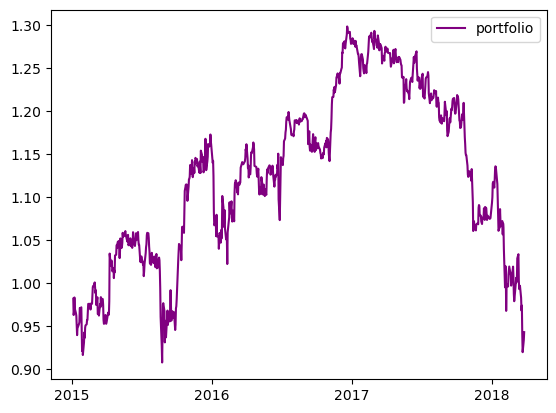

In [ ]:
# multiply the weights by the returns and sum them up to get the portfolio return
returns['Portfolio'] = returns @ weights

# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(dates.YearLocator())
plt.legend()
plt.show()

### Portfolio Variance

Calculating the covariance of a portfolio is a bit more complicated than calculating the variance of a single stock. The formula for the covariance of a portfolio is: *Portfolio variance = Weights transposed x (Covariance matrix x Weights)*

In [ ]:
# Get percentage daily returns
daily_returns = stock_returns.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov())*250

# Calculate the portfolio variance
port_variance = weights.T @ cov_matrix @ weights

# Print the result
print(f"{np.round(port_variance, 4)* 100}%")
print(cov_matrix)

2.55%
            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


Let's talk about the difference between variance and standard deviation. Both measures are used in practice to calculate market or stock volatility. Why should you use one or the other? In the variance calculation we square the weights and the variances. Because of this squaring, the variance is no longer in the same unit of measurement as the original data. Taking the root of the variance means the standard deviation is restored to the original unit of measure and therefore much easier to interpret.

In [ ]:
port_standard_deviation = np.sqrt(port_variance)
print(f"{np.round(port_standard_deviation, 4)* 100}%")

15.959999999999999%


In [ ]:
pf_returns = stock_returns.iloc[:,1]
# count the number of months in the dataset
months = round(len(pf_returns)/21) - 1
sp_500 = pd.Series(sp500.iloc[:,0])

Suppose you invested in PG at the beginning of 2015 in a portfolio. By the end of March 2018, you wonder how your portfolio has performed over time, and whether it is as good as another portfolio which started trading mid-2016. What performance metric do you look at? Well, the annualized return of course! So let's calculate the annualized rate of return for your portfolio. Since our sample covers 3.2 years, let's use the monthly denomination in the formula for annualized returns. The number of months is already given under `months`

In [ ]:
# Calculate total rate of return from start to end
total_return = (pf_returns[-1] - pf_returns[0]) / pf_returns[0]
print(f"{np.round(total_return, 4)* 100}%")

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print(f"{np.round(annualized_return, 4)* 100}%")

73.1%
18.92%


In the last exercise, you saw that the annualized rate of return was 91.34%. That's pretty high! But since our portfolio consists of only 4 stocks, this high return is indeed possible as it is not very diversified. Let's compare the portfolio's annual rate of return, with that of the S&P500, which is much more diversified.

The value of the S&P500 between 1st of January 2015 and end of December 2018 has been made available. That's 4 years of data. You have full years this time, so use the year denomination in the formula for the annualized return. The data is stored under `sp500_value`

In [ ]:
# Calculate the total return from the S&P500 value series
total_return = (sp_500[-1] - sp_500[0]) / sp_500[0]
print(f"{np.round(total_return, 4)* 100}%")

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print(f"{np.round(annualized_return, 4)* 100}%")

37.62%
8.309999999999999%


### Risk Adjusted Return

The Sharpe ratio is a measure for calculating risk-adjusted return. It is the average return earned in excess of the risk-free rate per unit of volatility or total risk. The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. The Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

In [ ]:
rfr = 0.02

# Calculate the total return from the S&P500 value series
total_return = (sp_500[-1] - sp_500[0]) / sp_500[0]
print(f"{np.round(total_return, 4)* 100}%")

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1

# Create the returns data 
returns_sp500 = sp_500.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

37.62%
0.46359234752393924


Calculating the Sharpe Ratio of a Portfolio

In [ ]:
# Calculate total rate of return from start to end
total_return = (pf_returns[-1] - pf_returns[0]) / pf_returns[0]
print(f"{np.round(total_return, 4)* 100}%")

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_returns.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print(f"Sharpe ratio: {np.round(sharpe_ratio, 4)* 100}%")

73.1%
Sharpe ratio: 78.33%


## Non-Normal Distributions

In [ ]:
returns_sp500 = sp_500.pct_change()

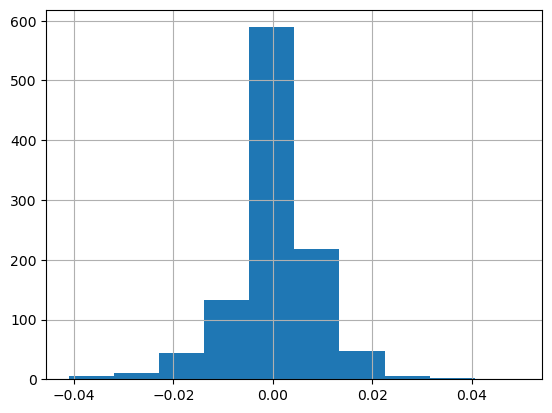

In [ ]:
# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist()
plt.show()

In [ ]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  0.03389998442910263
Std. dev  :  0.8610018502291795
skew :  -0.3831994518762794
kurt :  3.9223911008585053


### Alternative Measures of Risk

Which you'll use to calculate the Sortino ratio. The Sortino ratio is just like the Sharpe ratio, except for that it uses the standard deviation of the negative returns only, and thereby focuses more on the downside of investing.

In [ ]:
pf_factor = pd.read_csv(data/'factors_pf_returns.csv', index_col=0, parse_dates=True)

In [ ]:
target = 0

# Create a downside return column with the negative returns only
downside_returns = pf_factor.loc[pf_factor['pf_returns'] <  target]

# Calculate expected return and std dev of downside
expected_return = pf_factor['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  7.648403652308076
Downside risk   :  56.81705809701296
Sortino ratio :  0.09941387043770626


The maximum draw-down of the S&P500 (also known as "peak to trough performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst performance of the S&P500 in the past years.

It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of their investment (e.g., 70%) in a short period.

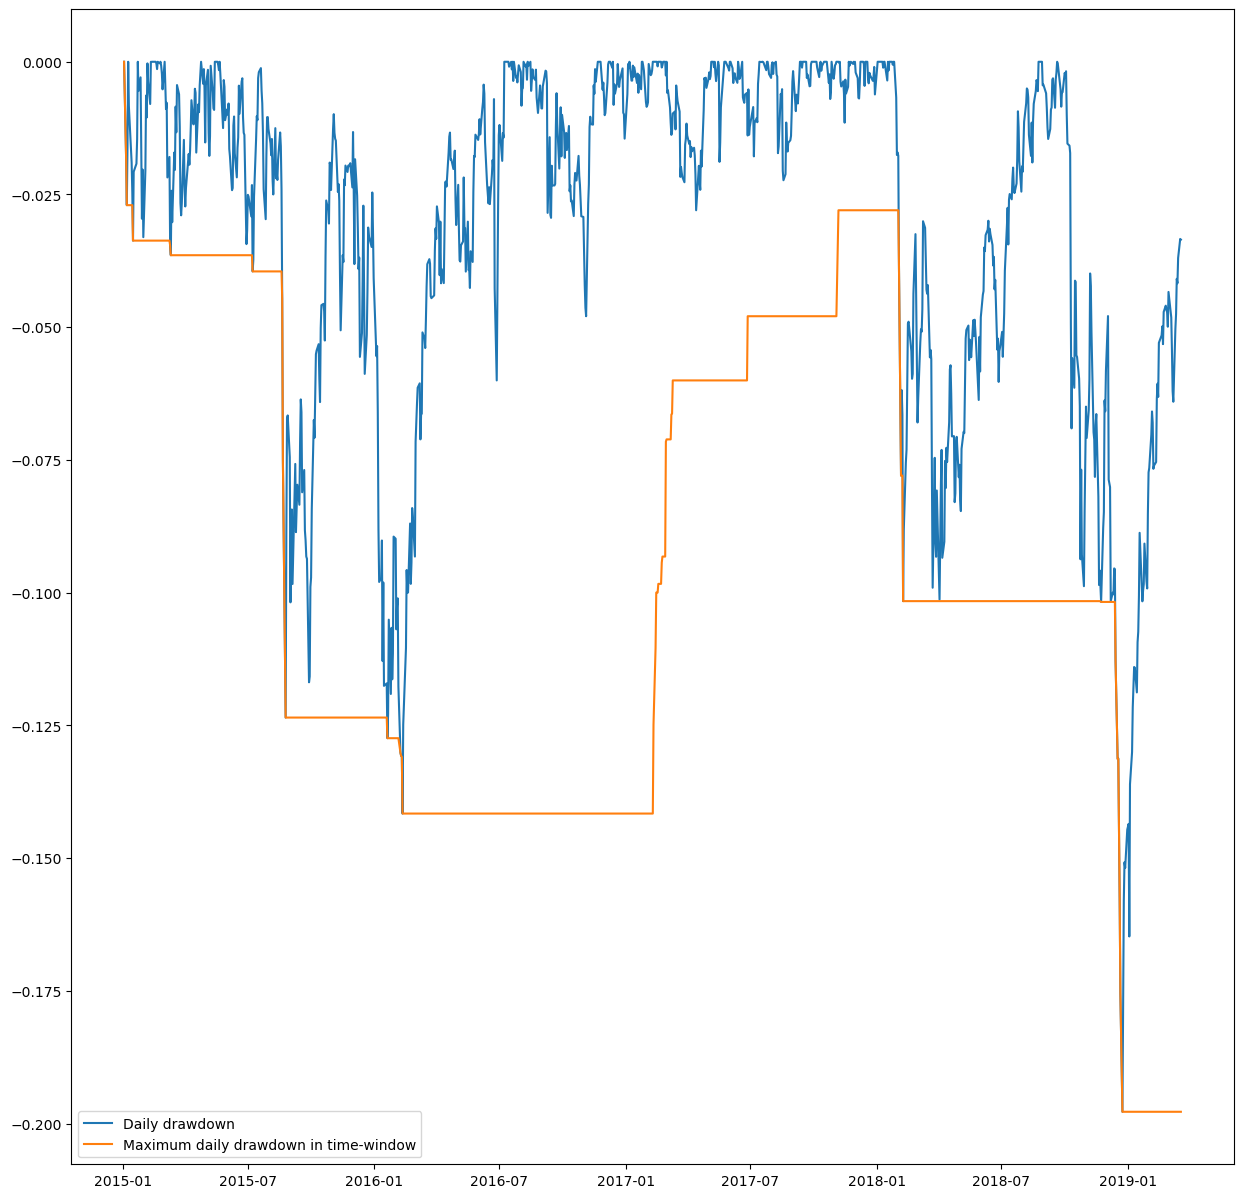

In [ ]:
date = sp500.index
# Calculate the max value 
roll_max = sp500.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = sp500/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(date, daily_draw_down, label='Daily drawdown')
plt.plot(date, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

## Portfolio Optimization

We're going to calculate active return of a portfolio. The active return is the return of a portfolio, minus the return of a benchmark. The benchmark is a portfolio that is used as a reference. It is often a market index, such as the S&P500. The active return is the return of a portfolio, minus the return of a benchmark. The benchmark is a portfolio that is used as a reference. It is often a market index, such as the S&P500.

In [ ]:
#Import data
portfolio_data = pd.read_csv(data/'large_pf.csv', index_col=0)

# Check the portfolio weights
print(f"The sum of the portfolio weights is {portfolio_data.pf_weights.sum():.2f}%.")

The sum of the portfolio weights is 100.00%.


In [ ]:
# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()

# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()

# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

22.58%


We're going to calculate he relative industry position of your portfolio, versus a benchmark. As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"), as they are a large driver of performance, as well as a potential source of risk.

In [ ]:
# Print the sum of the bm and pf weights
print (portfolio_data.bm_weights.sum())
print (portfolio_data.pf_weights.sum())

# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

100.001
100.0
GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


### Risk Factors 

We're going to calculate the risk factors of a portfolio. The risk factors of a portfolio are the risk factors that are unique to the portfolio. The risk factors of a portfolio are the risk factors that are unique to the portfolio. The risk factors of a portfolio are the risk factors that are unique to the portfolio.

**Different Factors to Consider**

1. Macro Factors: These are factors that are not specific to a particular industry, but rather affect the entire economy. Examples of macro factors are interest rates, inflation, currency and GDP growth.

2. Style Factors: This factors such as momentum, value, size, quality, low volatility, etc.

In [ ]:
pf_factor = pd.read_csv(data/'pf_factors.csv', index_col=0)
pf_factor

,S&P500,WML,value_factor,portfolio
date,,,,
2016-01-04,-1.530373,-1.69,-1.53,-1.651745
2016-01-05,0.201223,0.38,0.10,0.408161
2016-01-06,-1.311540,1.27,-1.22,0.325555
2016-01-07,-2.370044,0.21,-2.38,-0.698259
2016-01-08,-1.083837,-0.20,-0.91,-0.959352
...,...,...,...,...
2016-12-23,0.125172,-0.35,0.07,0.438153
2016-12-27,0.224837,0.14,0.27,0.430411
2016-12-28,-0.835653,0.08,-0.69,-0.903525


A stock is showing "momentum" if its prior 12-month average of returns is positive. The momentum factor is therefore formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are typically ratios to measure "value". Let's see how our S&P500 returns relate to the returns of these factors.

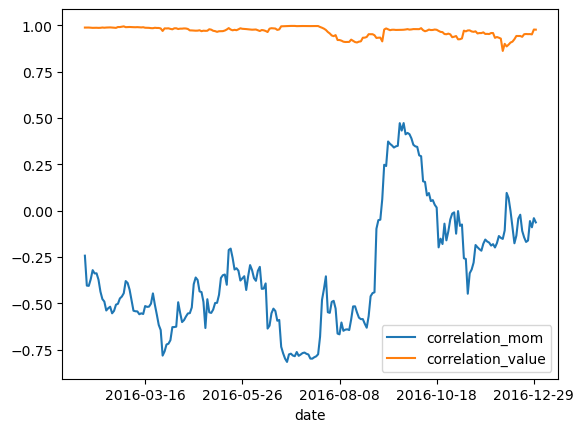

In [ ]:
# Calculate 20-day rolling correlation with momentum 
pf_factor['correlation_mom']=pf_factor['S&P500'].rolling(20).corr(pf_factor['WML'])

# Calculate 20-day rolling correlation with value
pf_factor['correlation_value']=pf_factor['S&P500'].rolling(20).corr(pf_factor['value_factor'])

# Plot the correlations
pf_factor['correlation_mom'].plot()
pf_factor['correlation_value'].plot()
plt.legend()
plt.show()

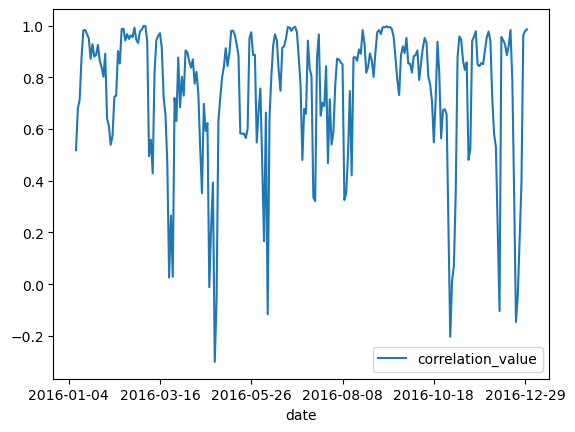

In [ ]:
factor_data = pf_factor.copy()

# Calculate the pairwise correlation
factor_data.corr()

# Calculate rolling 5 day correlation 
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value_factor'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show()

### Fama French Multifactor Model

The Fama French model is a model that uses 3 factors to explain the returns of a portfolio. The 3 factors are: 
1. Market Factor 
2. Size Factor 
3. Value Factor

This model is a very popular model in the finance industry. It is used to explain the returns of a portfolio, and to predict the returns of a portfolio. 

In [ ]:
factor_returns = pd.read_csv(data/'factors_pf_returns.csv')

In [ ]:
print(factor_returns.corr(),'\n')
print(f"The performance of this portfolio can largely be explained by market returns, but not so much by factor returns.")

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000 

The performance of this portfolio can largely be explained by market returns, but not so much by factor returns.


We'll now use linear regression to understand the effects of the 3 factors on the returns of our portfolio. We'll use the `statsmodels` library to do this.

In [ ]:
# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

# Print out the summary
model.summary()
b1, b2, b3 = model.params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


### Portfolio Analysis Tools

MOst institutional investors use portfolio analysis tools to analyze their portfolios. These tools are used to analyze the performance of a portfolio, and to optimize the portfolio. We can also use backtesting to analyze the performance of a portfolio. This refers to applyinh a strategy to historical data, and then analyzing the performance of the strategy.

The `pypfopt` library is a Python library that allows you to perform portfolio optimization. It is a Python library that allows you to perform portfolio optimization. It is a Python library that allows you to perform portfolio optimization.

The `pyfolio` library is a Python library that allows you to perform portfolio analysis. It is a Python library that allows you to perform portfolio analysis. It is a Python library that allows you to perform portfolio analysis.

In [ ]:
# Convert index to DatetimeIndex
sp500.index = pd.to_datetime(sp500.index)

# Calculate the returns of S&P500
returns_sp500 = sp500.pct_change()

# Ensure the returns are a series with a DatetimeIndex
returns = pd.Series(returns_sp500['S&P500'], index=returns_sp500.index)

# Create the returns tear sheet
try:
    fig = pf.create_returns_tear_sheet(returns, return_fig=True)
except AttributeError:
    print("Error: AttributeError")

# Display a zoomed in version of the tear sheet
# display_tear_sheet()

Start date,2015-01-02
End date,2019-03-19
Total months,50
,Backtest
Annual return,7.9%
Cumulative returns,37.6%
Annual volatility,13.7%
Sharpe ratio,0.63
Calmar ratio,0.40
Stability,0.85
Max drawdown,-19.8%


Error: AttributeError


In [ ]:
# # Define sector mappings
# sect_map = {'COST': 'Consumer Goods',
#             'INTC': 'Technology', 
#             'CERN': 'Healthcare', 
#             'GPS': 'Technology',
#             'MMM': 'Construction', 
#             'DELL': 'Technology', 
#             'AMD': 'Technology'}

# # Create sector exposure tear sheet
# pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)
# display_tear_sheet()

NameError: name 'positions' is not defined

## Modern Portfolio Theory

When we are working on a portfolio, we want to maximize the return of the portfolio, while minimizing the risk of the portfolio. This is called portfolio optimization. The optimization problem is to find the optimal weights of the portfolio. 

The efficient frontier is a curve that shows the optimal portfolios for a given risk level. The efficient frontier is a curve that shows the optimal portfolios for a given risk level. The efficient frontier is a curve that shows the optimal portfolios for a given risk level.

<!-- ![](https://en.wikipedia.org/wiki/Efficient_frontier#/media/File:Markowitz_frontier.jpg)  -->

In [ ]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
print (mu, Sigma)

In [ ]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()

# Calculate the annualized covariance matrix 
covMatrix = returns.cov()*252

# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Sigma = risk_models.sample_cov(stock_prices)

# Print both covariance matrices
print (covMatrix, Sigma)